<a href="https://colab.research.google.com/github/LuisAL79/PIBIC_UNIFESSPA/blob/main/Lagrange_Artigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'Raio (r)': [5.41926070139289, 10.8385214027858, 0.369054029728806],
 'Altura (h)': [10.8385214027858, 2.70963035069644, 2337.06194500607],
 'Área (A)': [553.581044593209, 922.635074322014, 5420.11647674120],
 'Volume (V)': [1000.00000000000, 1000.00000000000, 1000.00000000000]}

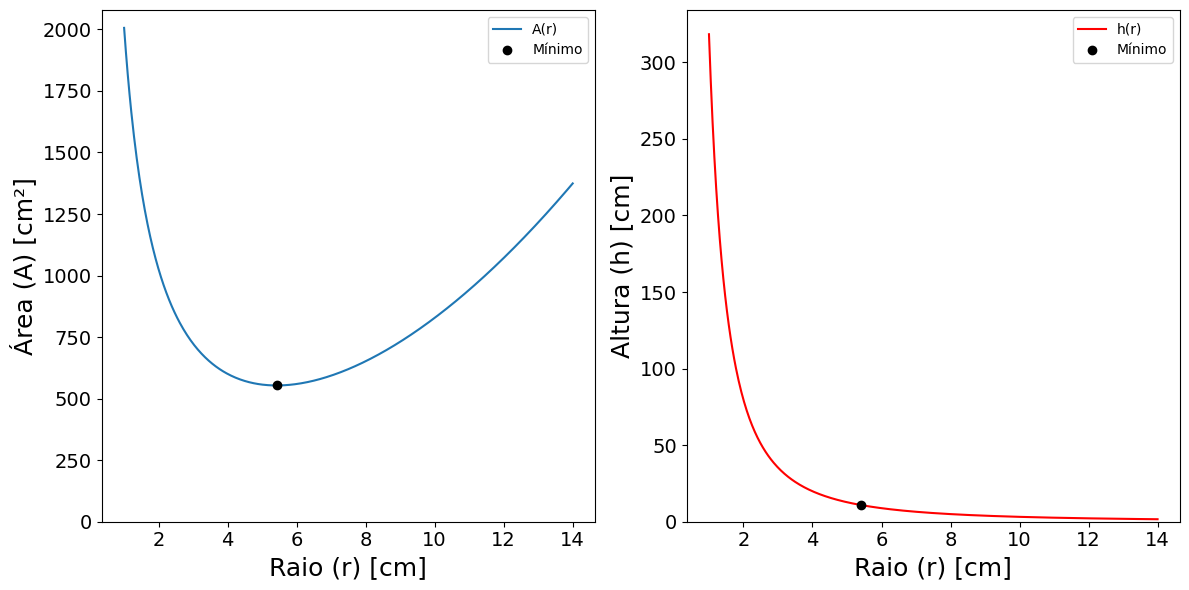

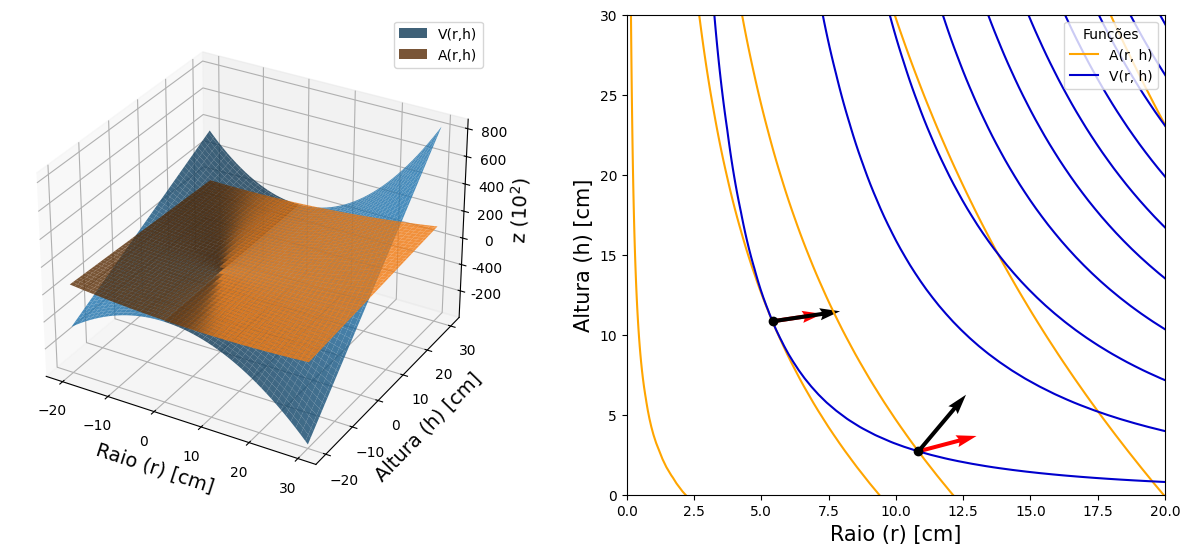

In [ ]:
from sympy import symbols, Eq, diff, solve, lambdify, pi, N
import numpy as np
import matplotlib.pyplot as plt
from sympy.interactive import printing
printing.init_printing(use_latex=True)

def optimize_and_plot(g, A, r_interval):

    # Definir variáveis simbólicas
    r, h, lam = symbols('r h lambda')

    # Derivadas da função objetivo e da restrição
    dAr = diff(A, r) ; dAh = diff(A, h)
    dgr = diff(g, r) ; dgh = diff(g, h)

    # Equações do sistema
    Eq1 = Eq(dAr, lam * dgr)
    Eq2 = Eq(dAh, lam * dgh)
    # Resolver o sistema de equações
    ff = solve((Eq1, Eq2, g), (r, h, lam))
    # Extrair soluções reais
    for num in ff[0]:
      solutions = [ rr for rr in ff[0] if num.is_real]

    # Resolver h em função de r
    hsol = solve(g, h)[0]

    rs, hs, As, gs = [], [], [], []
    for sol in solutions:
      r_val = sol ; h_val = hsol.subs(r,r_val)
      rs.append(N(r_val)) ; hs.append(N(h_val))
      As.append(N(A.subs({r: r_val, h: h_val})))
      gs.append(N(pi*(r_val**2)*h_val))

    # Exibir resultados
    ind = As.index(min(As)) ; ro = rs[ind] ; ho = hs[ind] ; Ao = As[ind]
    display({"Raio (r)": rs, "Altura (h)": hs, "Área (A)": As, "Volume (V)": gs})

    # Substituir h em A
    funA = A.subs({h: hsol})

    # Converter funções para uso numérico
    fA = lambdify(r, funA, 'numpy')
    fh = lambdify(r, hsol, 'numpy')

    # Gerar o intervalo de r
    inter = np.linspace(r_interval[0], r_interval[1], 500)

    # Criar gráficos
    plt.figure(figsize=(12, 6))

    # Gráfico de A(r)
    plt.subplot(121)
    plt.plot(inter, fA(inter), label="A(r)")
    plt.plot(ro, Ao, 'ko', label="Mínimo")
    plt.ylim(0, None)
    plt.ylabel("Área (A) [cm²]",fontsize=18)
    plt.xlabel("Raio (r) [cm]",fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend()

    # Gráfico de h(r)
    plt.subplot(122)
    plt.plot(inter, fh(inter), 'r-', label="h(r)")
    plt.plot(ro, ho, 'ko', label="Mínimo")
    plt.ylabel("Altura (h) [cm]",fontsize=18)
    plt.xlabel("Raio (r) [cm]",fontsize=18)
    plt.ylim(0, None)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend()

    plt.savefig("fig1.png", dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()
    plt.close()

    # Definir a função g e A
    def g_func(r, h):
      g = np.pi * r**2 * h - 1000
      A = 2 * np.pi * r * h + 2 * np.pi * r**2
      return g, A

    # Gerar intervalos de r e h
    rp = np.linspace(-20, 30, 100) ; hp = np.linspace(-20, 30, 100)
    R, H = np.meshgrid(rp, hp)

    # Calcular valores das funções
    G, A = g_func(R, H)

    # Criar figuras 3D
    fig = plt.figure(figsize=(14.8, 6))
    print()

    # Gráfico da função g
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(R, H, G,  edgecolor='none', alpha=0.8, label='V(r,h)')
    ax1.plot_surface(R, H, A,  edgecolor='none', alpha=0.8,label='A(r,h)')
    ax1.set_xlabel("Raio (r) [cm]",fontsize=14)
    ax1.set_ylabel("Altura (h) [cm]",fontsize=14)
    ax1.set_zlabel(" z ($10^2$)",fontsize=14)
    ax1.set_zticks([-40000, -20000, 0, 20000, 40000, 60000, 80000], ['-200', '-400', '0', '200', '400', '600', '800'])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()

    ax2 = fig.add_subplot(122)
    contour_A = ax2.contour(R, H, A, [30,553,923,2500,5420], colors='orange')
    contour_g = ax2.contour(R, H, G, levels=35, colors='mediumblue')
    ax2.plot(rs, hs, 'ko', label="Mínimo")
    # Adicionando uma legenda manual
    legend_labels = [
    plt.Line2D([0], [0], color='orange', label='A(r, h)'),
    plt.Line2D([0], [0], color='mediumblue', label='V(r, h)')
    ]
    ax2.legend(handles=legend_labels, loc='upper right', title="Funções")

    # Adicionar o vetor
    xp, yp = [float(ri) for ri in rs], [float(hi) for hi in hs]
    dx = [float(N(dAr.subs({r: ri, h: hi}) / 100)) for ri, hi in zip(rs, hs)]
    dy = [float(N(dAh.subs({r: ri, h: hi}) / 100)) for ri, hi in zip(rs, hs)]
    dxg = [float(N(dgr.subs({r: ri, h: hi}) / 200)) for ri, hi in zip(rs, hs)]
    dyg = [float(N(dgh.subs({r: ri, h: hi}) / 200)) for ri, hi in zip(rs, hs)]

    plt.quiver(
        xp, yp,  # Ponto inicial do vetor
        dx, dy,  # Direções x e y do vetor
        angles='xy', scale=15, color='red', label="Vetor"
    )
    plt.quiver(
        xp, yp,  # Ponto inicial do vetor
        dxg, dyg,  # Direções x e y do vetor
        angles='xy', scale=15, color='black', label="Vetor"
    )

    ax2.set_xlabel("Raio (r) [cm]",fontsize=15)
    ax2.set_ylabel("Altura (h) [cm]",fontsize=15)
    ax2.set_xlim([0, 20])
    ax2.set_ylim([0, 30])

    # Mostrar gráficos
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.savefig("fig2.png", dpi=300, bbox_inches='tight')
    plt.show()

# Exemplo de uso da função
r, h = symbols('r h')
g = pi * r**2 * h - 1000
A = 2 * pi * r * h + 2 * pi * r**2
optimize_and_plot(g, A, (1, 14))